## Chapter 4 (Another way to do dimension reduction, other than PCA)
### Video 1: Non-negative matrix factorization (NMF)

#### 2. Non-negative matrix factorization
##### - NMF stands for "non-negative matrix factorization". NMF, like PCA, is a dimension reduction technique. 
##### - In constract to PCA, however, NMF models are interpretable. 
##### - This means an NMF models are easier to understand yourself, and much easier for you to explain to others. 
##### - NMF can not be applied to every dataset, however. It is required that the sample features be "non-negative", so greater than or equal to 0.

#### 3. Interpretable parts
##### - NMF achieves its interpretability by decomposing samples as sums of their parts. 
##### - For example, NMF decomposes documents as combinations of common themes, and images as combinations of common patterns.

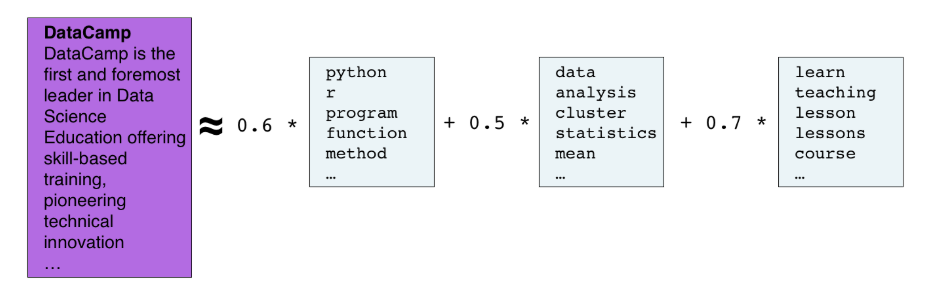

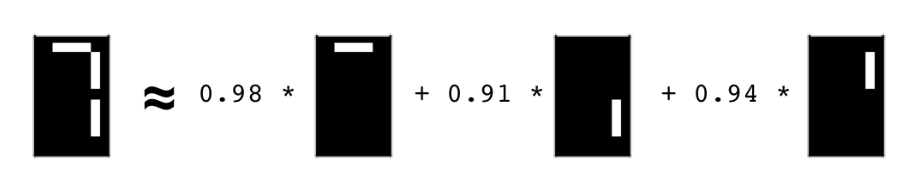

#### 4. Using scikit-learn NMF
##### - NMF is available in scikit learn, and follows the same fit/transform pattern as PCA. 
##### - However, unlike PCA, the desired number of components must always be specified. 
##### - NMF works both with numpy arrays and sparse arrays in the csr_matrix format.

#### 5. Example word-frequency array
##### - In this toy dataset, there are only 4 words in the vocabulary, and these correspond to the four columns of the word-frequency array. 
##### - Each row represents a document, and the entries of the array measure the frequency of each word in the document using what's known as "tf-idf". ##### - "tf" is the frequency of the word in the document. So if 10% of the words in the document are "datacamp", then the tf of "datacamp" for that document is point-1. "idf" is a weighting scheme that reduces the influence of frequent words like "the".

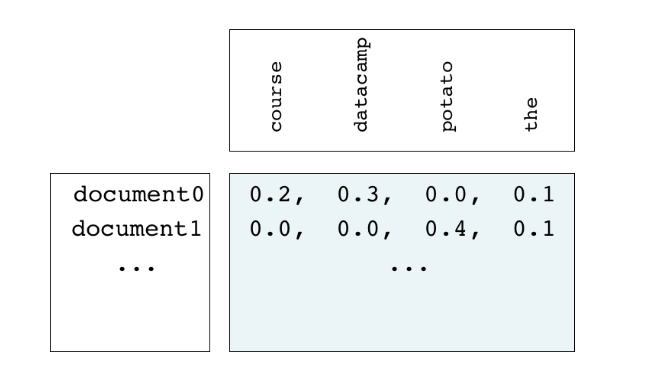

#### 6. NMF components
##### - Just as PCA has principal components, NMF has components which it learns from the samples, and as with PCA, the dimension of the components is the same as the dimension of the samples. 
##### - In our example, for instance, there are 2 components, and they live in 4 dimensional space, corresponding to the 4 words in the vocabulary. The entries of the NMF components are always non-negative.

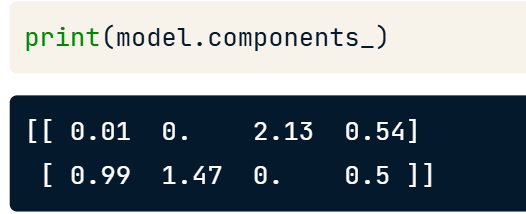

##### - As we saw with PCA, our transformed data in this example will have two columns, corresponding to our two new features. The features and the components of an NMF model can be combined to approximately reconstruct the original data samples.

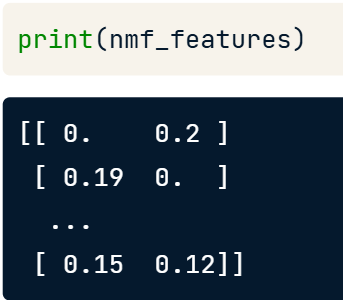

#### 7. Reconstruction of a sample
##### - Let's see how this works with a single data sample. Here is a sample representing a document from our toy dataset, and here are its NMF feature values. Now if we multiply each NMF components by the corresponding NMF feature value, and add up each column, we get something very close to the original sample.

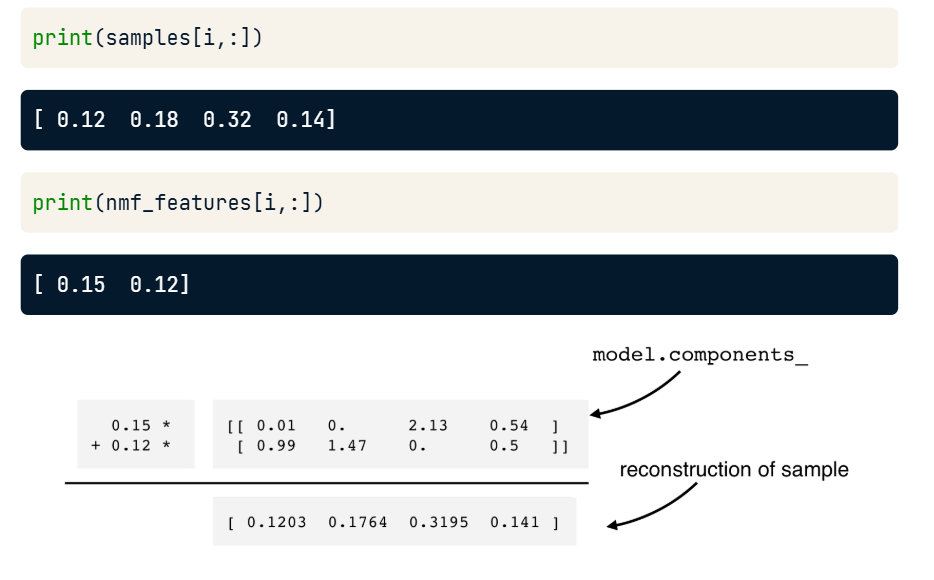

##### - So a sample can be reconstructed by multiplying the NMF components by the NMF feature values of the sample, and adding up. This calculation also can be expressed as what is known as a product of matrices. We won't be using that point of view, but that's where the "matrix factorization", or "MF", in NMF comes from.


In [ ]:
# Exercise 1: NMF applied to Wikipedia articles
# In the video, you saw NMF applied to transform a toy word-frequency array. 
# Now it's your turn to apply NMF, this time using the tf-idf word-frequency array of Wikipedia articles, given as a csr matrix articles. 
# Here, fit the model and transform the articles. In the next exercise, you'll explore the result.
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))

# Exercise 2: NMF features of the Wikipedia articles
# Now you will explore the NMF features you created in the previous exercise. 
# A solution to the previous exercise has been pre-loaded, so the array nmf_features is available. 
# Also available is a list titles giving the title of each Wikipedia article.

# When investigating the features, notice that for both actors, the NMF feature 3 has by far the highest value. 
# This means that both articles are reconstructed using mainly the 3rd NMF component.
# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

### Video 2: NMF learns interpretable parts
##### - Components of NMF represent patterns that frequently occur in the samples.

#### 1. Example: NMF learns interpretable parts
##### - Let's consider a concrete example, where scientific articles are represented by their word frequencies. 
##### - There are 20000 articles, and 800 words. So the array has 800 columns.
##### -Let's fit an NMF model with 10 components to the articles. The 10 components are stored as the 10 rows of a 2-dimensional numpy array.

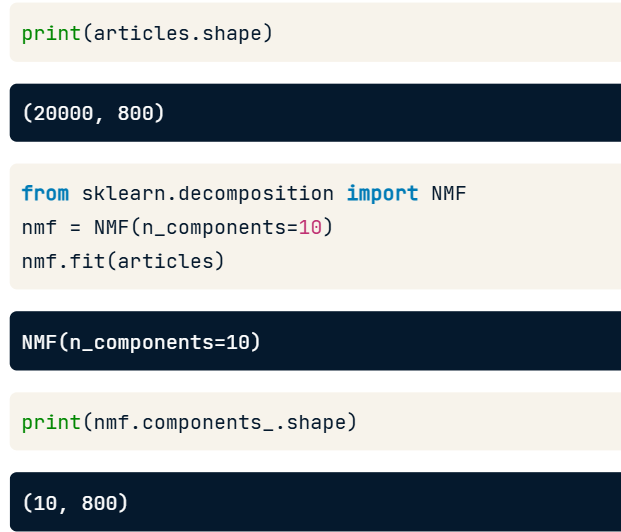

#### 2. NMF components are topics
##### - The rows, or components, live in an 800-dimensional space - there is one dimension for each of the words. Aligning the words of our vocabulary with the columns of the NMF components allows them to be interpreted.

##### - Choosing a component, such as this one, and looking at which words have the highest values,

##### - we see that they fit a theme: the words are 'species', 'plant', 'plants', 'genetic', 'evolution' and 'life'.

##### - The same happens if any other component is considered.

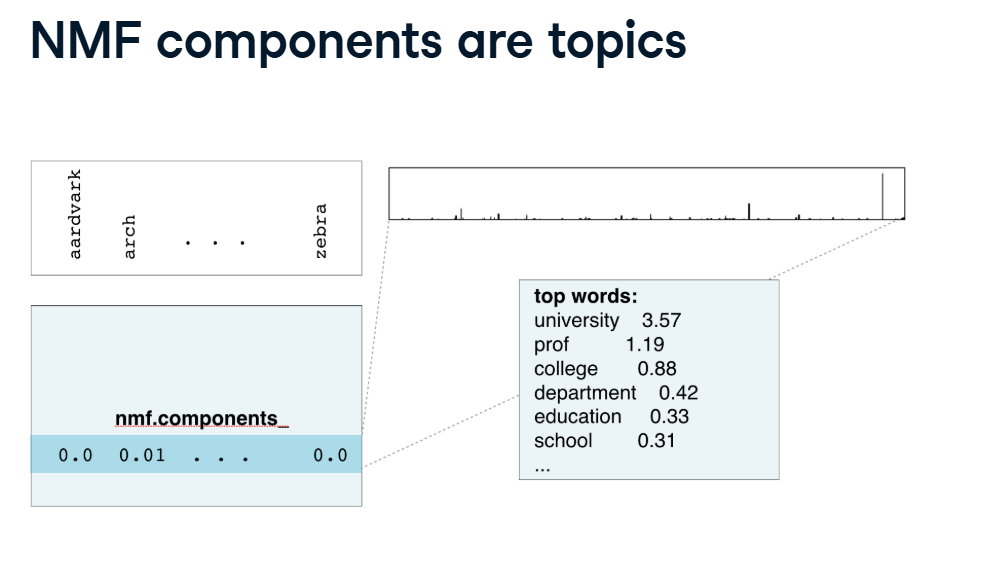

#### 3. NMF components
##### - If NMF is applied to documents, then the components correspond to topics, and the NMF features reconstruct the documents from the topics. 
##### - If NMF is applied to a collection of images, then the NMF components represent patterns that frequently occur in the images. 
##### - In this example, for instance, NMF decomposes images from an LCD display into the individual cells of the display. This example you'll investigate for yourself in the exercises. To do this, you'll need to know how to represent a collection of images as a non-negative array.

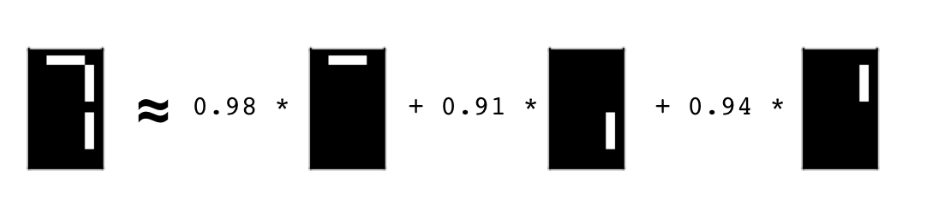

#### 4. Grayscale images
##### - An image in which all the pixels are shades of gray ranging from black to white is called a "grayscale image".

##### - Since there are only shades of grey, a grayscale image can be encoded by the brightness of every pixel. 
##### - Representing the brightness as a number between 0 and 1, where 0 is totally black and 1 is totally white, the image can be represented as 2-dimensional array of numbers.

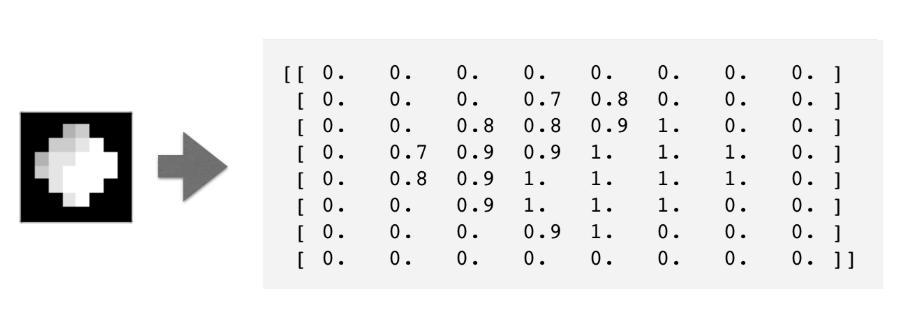

##### - These 2-dimensional arrays of numbers can then be flattened by enumerating the entries. For instance, we could read-off the values row-by-row, from left-to-right and top to bottom. The grayscale image is now represented by a flat array of non-negative numbers.

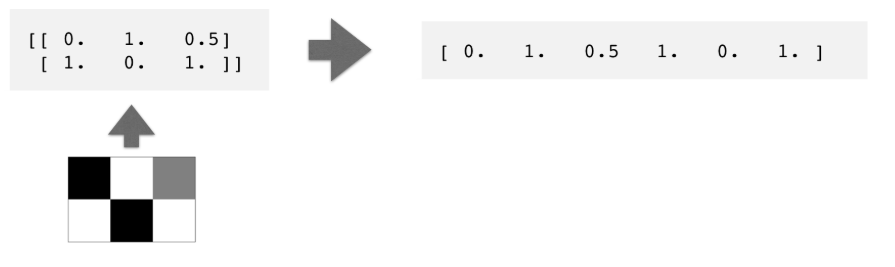

#### 5. Encoding a collection of images
##### - A collection of grayscale images of the same size can thus be encoded as a 2-dimensional array, in which each row represents an image as a flattened array, and each column represents a pixel. 
##### - Viewing the images as samples, and the pixels as features, we see that the data is arranged similarly to the word frequency array. Indeed, the entries of this array are non-negative, so NMF can be used to learn the parts of the images.

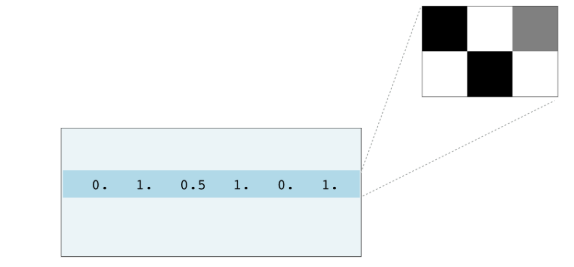

#### 6. Visualizing samples
##### - It's difficult to visualize an image by just looking at the flattened array. To recover the image, use the reshape method of the sample, specifying the dimensions of the original image as a tuple. This yields the 2-dimensional array of pixel brightnesses. To display the corresponding image, import pyplot, and pass the 2-dimensional array to the plt dot imshow function.

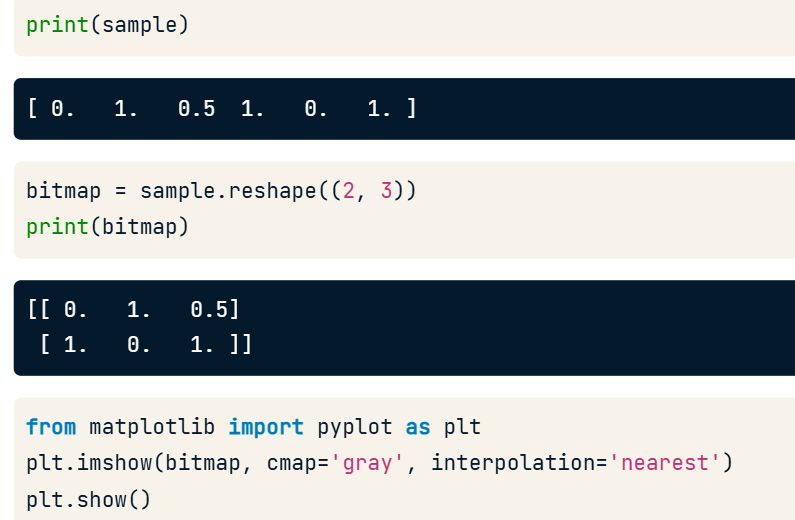

In [ ]:
# Exercise 1: NMF learns topics of documents
# Previously, you saw that the 3rd NMF feature value was high for the articles about actors Anne Hathaway and Denzel Washington. 
# In this exercise, identify the topic of the corresponding NMF component.
# The NMF model you built earlier is available as model, while words is a list of the words that label the columns of the word-frequency array.
# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())

# Exercise 2: Explore the LED digits dataset
# In the following exercises, you'll use NMF to decompose grayscale images into their commonly occurring patterns. 
# Firstly, explore the image dataset and see how it is encoded as an array. 
# You are given 100 images as a 2D array samples, where each row represents a single 13x8 image. 
# The images in your dataset are pictures of a LED digital display.
# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape((13, 8))

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

# Exercise 3: NMF learns the parts of images
# Now use what you've learned about NMF to decompose the digits dataset. You are again given the digit images as a 2D array samples. 
# This time, you are also provided with a function show_as_image() that displays the image encoded by any 1D array:

def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Select the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

# Exercise 4: PCA doesn't learn parts
# PCA components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. 
# Verify this for yourself by inspecting the components of a PCA model fit to the dataset of LED digit images from the previous exercise. 
# The images are available as a 2D array samples. 
# Also available is a modified version of the show_as_image() function which colors a pixel red if the value is negative.
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)
    

### Video 3: Building recommender systems using NMF

#### 1. Finding similar articles
##### - Suppose that you are an engineer at a large online newspaper. 
##### - You've been given the task of recommending articles that are similar to the article currently being read by a customer. 
##### - Given an article, how can you find articles that have similar topics?

##### - Our strategy for solving this problem is to apply NMF to the word-frequency array of the articles, and to use the resulting NMF features. 
##### - You learned in the previous videos these NMF features describe the topic mixture of an article. So similar articles will have similar NMF features. 
##### - But how can two articles be compared using their NMF features? 

#### 2. Apply NMF to the word-frequency array
##### - You are given a word frequency array articles corresponding to the collection of newspaper articles in question. 
##### - Import NMF, create the model, and use the fit_transform method to obtain the transformed articles. 
##### - Now we've got NMF features for every article, given by the columns of the new array.

nmf= NMF(n_components=6)
nmf_features = nmf.fit_transform(articles)

##### - Now we need to define how to compare articles using their NMF features.

#### 3. Versions of articles
##### - Similar documents have similar topics, but it isn't always the case that the NMF feature values are exactly the same. 
##### - For instance, one version of a document might use very direct language, whereas other versions might interleave the same content with meaningless chatter.
##### - Meaningless chatter reduces the frequency of the topic words overall, which reduces the values of the NMF features representing the topics.
##### - However, on a scatter plot of the NMF features, all these versions lie on a single line passing through the origin.

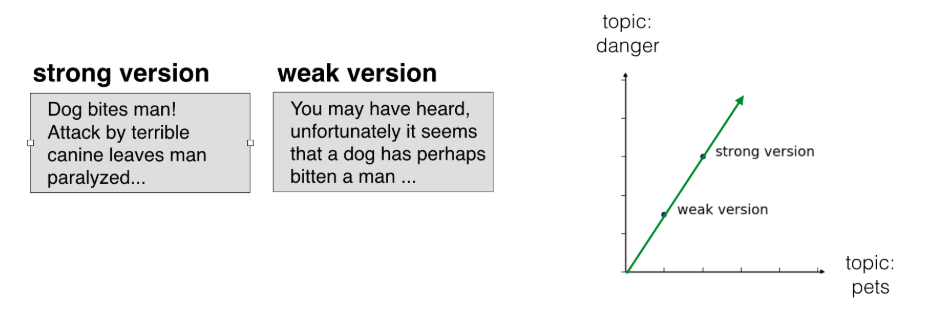

#### 4. Cosine similarity
##### - For this reason, when comparing two documents, it's a good idea to compare these lines. 
##### - We'll compare them using what is known as the cosine similarity, which uses the angle between the two lines. Higher values indicate greater similarity. 

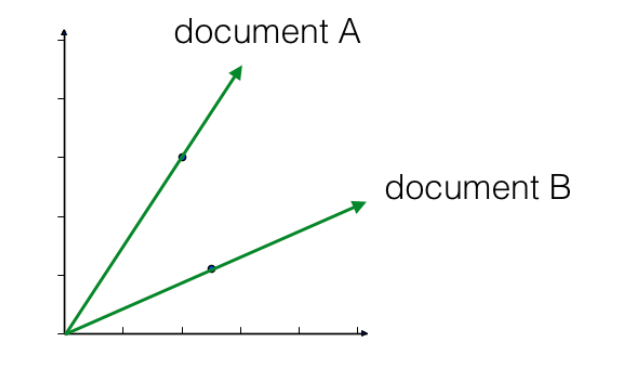

#### 5. Calculating the cosine similarities
##### - Let's see now how to compute the cosine similarity. Firstly, import the normalize function, and apply it to the array of all NMF features. 
##### - Now select the row corresponding to the current article, and pass it to the dot method of the array of all normalized features. 
##### - This results in the cosine similarities.

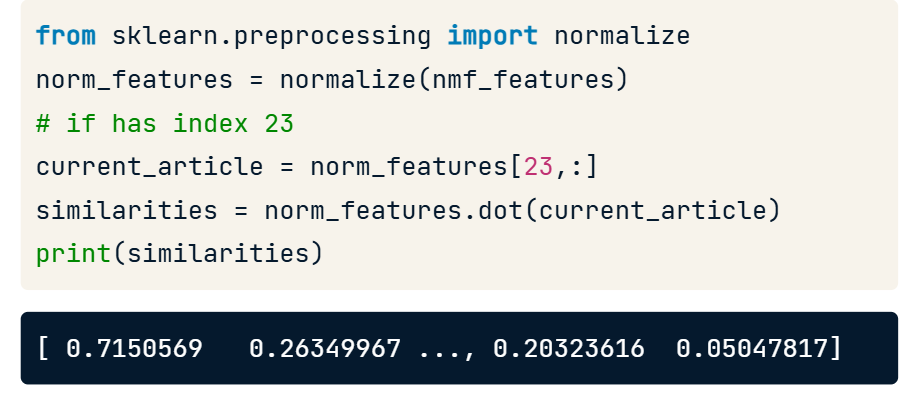

#### 6. DataFrames and labels
##### - With the help of a pandas DataFrame, we can label the similarities with the article titles. Start by importing pandas. 
##### - After normalizing the NMF features, create a DataFrame whose rows are the normalized features, using the titles as an index. 
##### - Now use the loc method of the DataFrame to select the normalized feature values for the current article, using its title 'Dog bites man'. 
##### - Calculate the cosine similarities using the dot method of the DataFrame.

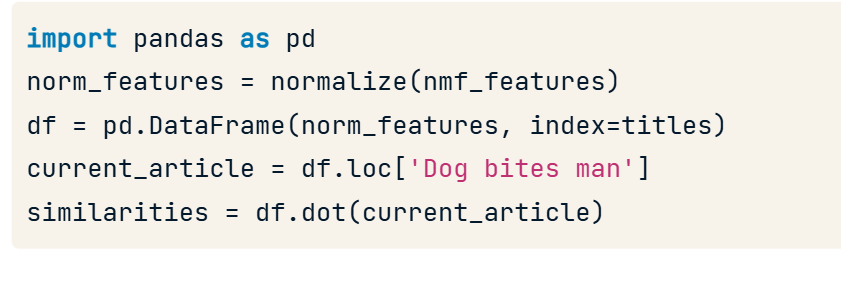

#### 7. DataFrames and labels
##### - Finally, use the nlargest method of the resulting pandas Series to find the articles with the highest cosine similarity. 
##### - We see that all of them are concerned with 'domestic animals' and/or 'danger'!

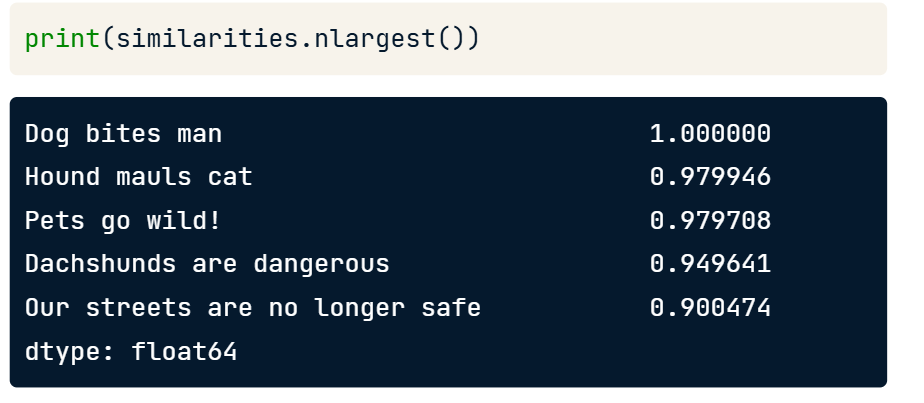

In [ ]:
# Exercise 1: Which articles are similar to 'Cristiano Ronaldo'?
# In the video, you learned how to use NMF features and the cosine similarity to find similar articles. 
# Apply this to your NMF model for popular Wikipedia articles, 
# by finding the articles most similar to the article about the footballer Cristiano Ronaldo. 
# The NMF features you obtained earlier are available as nmf_features, while titles is a list of the article titles.
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index = titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

# Exercise 2: Recommend musical artists part I
# In this exercise and the next, you'll use what you've learned about NMF to recommend popular music artists! 
# You are given a sparse array artists whose rows correspond to artists and whose columns correspond to users. 
# The entries give the number of times each artist was listened to by each user.

# In this exercise, build a pipeline and transform the array into normalized NMF features. 
# The first step in the pipeline, MaxAbsScaler, transforms the data so that all users have the same influence on the model, 
# regardless of how many different artists they've listened to. 
# In the next exercise, you'll use the resulting normalized NMF features for recommendation!

# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler,nmf,normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)

# Exercise 3: Recommend musical artists part II
# Suppose you were a big fan of Bruce Springsteen - which other musical artists might you like? 
# Use your NMF features from the previous exercise and the cosine similarity to find similar musical artists. 
# A solution to the previous exercise has been run, so norm_features is an array containing the normalized NMF features as rows. 
# The names of the musical artists are available as the list artist_names.

# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())